# Import

In [ ]:
# Our building tools
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier

# Preparing data
import pandas as pd
import numpy as np

# Analyzing data
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Data

In [ ]:
df = pd.read_csv('ACME-HappinessSurvey2020.csv')
df.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [ ]:
df.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


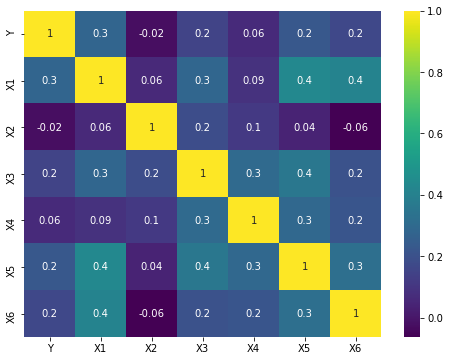

In [ ]:
corr = df.corr()
plt.subplots(figsize=(8, 6))

sns.heatmap(corr, cmap='viridis', annot=True, fmt='.1g')
plt.show()

Re-check the survey data:

    Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers
    X1 = my order was delivered on time
    X2 = contents of my order was as I expected
    X3 = I ordered everything I wanted to order
    X4 = I paid a good price for my order
    X5 = I am satisfied with my courier
    X6 = the app makes ordering easy for me

In the heatmap we can see that $X2$ (order contents) and $X4$ (the price) features are less reliable than others. When it comes to feature selecting, in many cases we will have many features and we should use feature selection algorithms. But since our data is a small one, we can remove the less related data safely to make a better prediction.

This shows us that these questions can be removed from the survey so we can stick up with the more important ones.

### Filtering Data

In [ ]:
df = df.drop(columns=['X2', 'X4'])

In [ ]:
X = df.drop(columns='Y')
y = df.Y

### Data Scaling

In [ ]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

### Train Test Split 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Comparison Between Models
We will see which model is likely to have a better performance

## Cross-Validation 

In [ ]:
score = cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=10)
print("KNeighborsClassifier: ", score.mean())

score = cross_val_score(LogisticRegression(), X_train, y_train, cv=10)
print("LogisticRegression: ", score.mean())

score = cross_val_score(LinearSVC(), X_train, y_train, cv=10)
print("SupportVectorClassifier: ", score.mean())

score = cross_val_score(RandomForestClassifier(), X_train, y_train, cv=10)
print("RandomForestClassifier: ", score.mean())

KNeighborsClassifier:  0.6055555555555555
LogisticRegression:  0.6055555555555556
SupportVectorClassifier:  0.6611111111111112
RandomForestClassifier:  0.6277777777777779


Looks like our best choices here are SVM and Random Forest. But still, it's just an estimation.

## K-NeighborClassifying

In [ ]:
n = 1
knc = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)

print(f"neighbors: {n}")
print(f"train score: {knc.score(X_train, y_train)}, test score: {knc.score(X_test, y_test)}")
print()

neighbors: 1
train score: 0.7340425531914894, test score: 0.5



## Logistic Regression

In [ ]:
C = 100
logreg = LogisticRegression(C=C).fit(X_train, y_train)

print(f"C: {C}")
print(f"train score: {logreg.score(X_train, y_train)}, test score: {logreg.score(X_test, y_test)}")
print()

C: 100
train score: 0.6702127659574468, test score: 0.46875



## Support Vector Classifier (SVC)

In [ ]:
C = 1
svc = LinearSVC(C=C).fit(X_train, y_train)

print(f"C: {C}")
print(f"train score: {svc.score(X_train, y_train)}, test score: {svc.score(X_test, y_test)}")
print()

C: 1
train score: 0.7127659574468085, test score: 0.46875



## Random Forest

In [ ]:
n = 10
forest = RandomForestClassifier(n_estimators=n).fit(X_train, y_train)

print(f"estimators: {n}")
print(f"train score: {forest.score(X_train, y_train)}, test score: {forest.score(X_test, y_test)}")
print()

estimators: 10
train score: 0.8191489361702128, test score: 0.6875



# Parameter Improvement for Random Forest
Lets see if we can find better parameters

In [ ]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [ ]:
parameters = {
    "n_estimators" : [5, 10, 50, 100, 250],
    "max_depth" : [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(RandomForestClassifier(), parameters, cv=5)
cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 8, 16, 32, None],
                         'n_estimators': [5, 10, 50, 100, 250]})

In [ ]:
display(cv)

Best parameters are: {'max_depth': 32, 'n_estimators': 5}


0.564 + or -0.074 for the {'max_depth': 2, 'n_estimators': 5}
0.64 + or -0.119 for the {'max_depth': 2, 'n_estimators': 10}
0.628 + or -0.08 for the {'max_depth': 2, 'n_estimators': 50}
0.617 + or -0.077 for the {'max_depth': 2, 'n_estimators': 100}
0.617 + or -0.077 for the {'max_depth': 2, 'n_estimators': 250}
0.553 + or -0.053 for the {'max_depth': 4, 'n_estimators': 5}
0.617 + or -0.077 for the {'max_depth': 4, 'n_estimators': 10}
0.617 + or -0.061 for the {'max_depth': 4, 'n_estimators': 50}
0.67 + or -0.044 for the {'max_depth': 4, 'n_estimators': 100}
0.659 + or -0.046 for the {'max_depth': 4, 'n_estimators': 250}
0.626 + or -0.095 for the {'max_depth': 8, 'n_estimators': 5}
0.574 + or -0.103 for the {'max_depth': 8, 'n_estimators': 10}
0.617 + or -0.051 for the {'max_depth': 8, 'n_estimators': 50}
0.649 + or -0.045 for the {'max_depth': 8, 'n_estimators': 100}
0.66 + or -0.071 for the {'max_depth': 8, 'n_estimators': 2

#### Lets pick our parameters and start training the final model

In [ ]:
n = 5
depth = 32
forest = RandomForestClassifier(n_estimators=n, max_depth=depth).fit(X_train, y_train)

print(f"estimators: {n}, depth: {depth}")
print(f"train score: {forest.score(X_train, y_train)}, test score: {forest.score(X_test, y_test)}")
print()

estimators: 5, depth: 32
train score: 0.8191489361702128, test score: 0.75



# Conclusion
When we compare the classifiers we used, we can see that Random Forest is the strongest model that we can build. Normally using such a complex model would be overkill for our small dataset, but since we can get more accurate results (and have a categorical data), we will use Random Forest which can reach up to a training accuracy of **%80**  and a test accuracy of **%75**.